In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from os.path import abspath
from os import chdir

In [2]:
joined_df = pd.read_csv('joined_df.csv', header=0)

In [3]:
joined_df = joined_df.set_index('Date Local')

In [4]:
co = joined_df['CO AQI']

In [5]:
data_types = joined_df.dtypes
float_indices = np.where(data_types == "float64")
float_vars = joined_df.dtypes.reset_index().iloc[float_indices[0], 0]

In [6]:
discarded_aqi = ['SO2', 'NO2', 'O3', 'CO']

In [7]:
import re
cnames = joined_df.columns
# p_formula -> pollutant formula
p_cnames = []
for p_formula in discarded_aqi:
    pattern = f"{p_formula}+[\s\w]*"
    p_cnames = np.unique(np.r_[p_cnames, re.findall(pattern, ", ".join(cnames))])

In [8]:
useful_vars = np.setdiff1d(float_vars, p_cnames)

In [9]:
p_cnames

array(['CO 1st Max Hour', 'CO 1st Max Value', 'CO AQI', 'CO Mean',
       'NO2 1st Max Hour', 'NO2 1st Max Value', 'NO2 AQI', 'NO2 Mean',
       'O3 1st Max Hour', 'O3 1st Max Value', 'O3 AQI', 'O3 Mean',
       'SO2 1st Max Hour', 'SO2 1st Max Value', 'SO2 AQI', 'SO2 Mean'],
      dtype='<U32')

In [10]:
useful_vars

array(['20_inch_soil_Max', '20_inch_soil_Mean', '20_inch_soil_Min',
       '4_inch_soil_Max', '4_inch_soil_Mean', '4_inch_soil_Min',
       'Air_Temp_Max', 'Air_Temp_Mean', 'Air_Temp_Min',
       'Precipitation_Total', 'Rel_Humdity_Max', 'Rel_Humidity_Mean',
       'Rel_Humidity_Min', 'Solar_Radiation_Total', 'Station_Number',
       'Vapor_Pressure_Deficit_Mean', 'Year', 'heat_units',
       'max_wind_speed', 'reference', 'wind_dir_std', 'wind_speed_Mean',
       'wind_vector_dir', 'wind_vector_mag'], dtype=object)

In [11]:
joined_df[p_cnames].columns

Index(['CO 1st Max Hour', 'CO 1st Max Value', 'CO AQI', 'CO Mean',
       'NO2 1st Max Hour', 'NO2 1st Max Value', 'NO2 AQI', 'NO2 Mean',
       'O3 1st Max Hour', 'O3 1st Max Value', 'O3 AQI', 'O3 Mean',
       'SO2 1st Max Hour', 'SO2 1st Max Value', 'SO2 AQI', 'SO2 Mean'],
      dtype='object')

In [12]:
useful_vars

array(['20_inch_soil_Max', '20_inch_soil_Mean', '20_inch_soil_Min',
       '4_inch_soil_Max', '4_inch_soil_Mean', '4_inch_soil_Min',
       'Air_Temp_Max', 'Air_Temp_Mean', 'Air_Temp_Min',
       'Precipitation_Total', 'Rel_Humdity_Max', 'Rel_Humidity_Mean',
       'Rel_Humidity_Min', 'Solar_Radiation_Total', 'Station_Number',
       'Vapor_Pressure_Deficit_Mean', 'Year', 'heat_units',
       'max_wind_speed', 'reference', 'wind_dir_std', 'wind_speed_Mean',
       'wind_vector_dir', 'wind_vector_mag'], dtype=object)

In [13]:
joined_df['CO AQI'] = co
useful_vars = np.r_[useful_vars, ['CO AQI']]

In [14]:
useful_vars[-3:]

array(['wind_vector_dir', 'wind_vector_mag', 'CO AQI'], dtype=object)

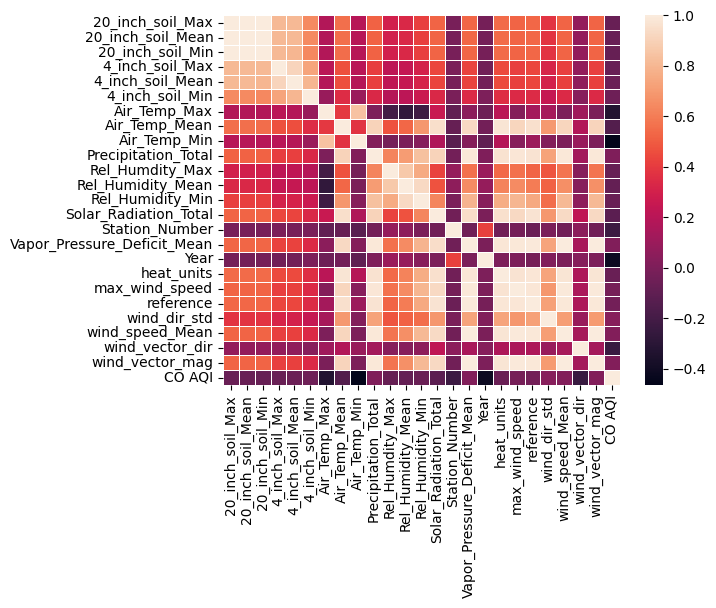

In [15]:
corr = joined_df[useful_vars].corr()
plt.figure()
sns.heatmap(corr, linewidths=.5)
plt.show()

In [16]:
X = joined_df[np.setdiff1d(useful_vars, ['CO AQI'])]

In [17]:
X_train = X[:round(0.7 * X.shape[0])]
X_test = X[round(0.7 * X.shape[0]):]

In [18]:
X_train

,20_inch_soil_Max,20_inch_soil_Mean,20_inch_soil_Min,4_inch_soil_Max,4_inch_soil_Mean,4_inch_soil_Min,Air_Temp_Max,Air_Temp_Mean,Air_Temp_Min,Precipitation_Total,...,Station_Number,Vapor_Pressure_Deficit_Mean,Year,heat_units,max_wind_speed,reference,wind_dir_std,wind_speed_Mean,wind_vector_dir,wind_vector_mag
Date Local,,,,,,,,,,,,,,,,,,,,,
2000-01-01,11.4,11.0,10.8,12.3,9.7,7.8,13.4,8.2,4.1,0.0,...,7.0,0.60,2000.0,2.4,6.4,0.1,52.0,2.2,147.0,1.3
2000-01-02,11.3,11.1,10.8,10.0,8.2,6.2,12.0,6.6,-1.1,1.0,...,7.0,0.50,2000.0,2.4,11.8,0.0,47.0,4.0,290.0,2.6
2000-01-03,11.1,10.6,10.1,9.7,6.2,3.3,13.4,3.8,-5.6,0.0,...,7.0,0.60,2000.0,2.9,8.3,0.0,62.0,2.5,16.0,1.0
2000-01-04,10.6,10.1,9.8,10.8,6.6,3.4,16.7,5.6,-4.9,0.0,...,7.0,0.80,2000.0,2.7,4.1,0.7,70.0,1.6,99.0,0.4
2000-01-05,10.5,10.0,9.8,11.3,7.5,4.3,18.1,8.0,-1.4,0.0,...,7.0,0.90,2000.0,3.6,8.5,1.2,62.0,2.8,302.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-13,22.6,22.3,22.1,28.2,21.4,15.2,30.4,20.3,5.7,0.0,...,9.0,2.21,2011.0,6.8,7.0,8.2,64.0,2.0,123.0,0.8
2011-05-14,23.2,22.9,22.6,28.4,22.3,16.6,29.5,20.1,8.1,0.0,...,9.0,2.10,2011.0,6.9,10.4,8.6,64.0,2.7,261.0,1.0
2011-05-15,23.5,23.3,23.1,28.4,22.2,16.3,29.2,19.7,7.4,0.0,...,9.0,2.11,2011.0,6.8,11.1,8.6,55.0,2.6,279.0,1.4


In [19]:
X_train['intercept'] = np.ones([X_train.shape[0], 1])
X_test['intercept'] = np.ones([X_test.shape[0], 1])

/tmp/ipykernel_181/1780510478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['intercept'] = np.ones([X_train.shape[0], 1])
/tmp/ipykernel_181/1780510478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['intercept'] = np.ones([X_test.shape[0], 1])


In [20]:
X_train

,20_inch_soil_Max,20_inch_soil_Mean,20_inch_soil_Min,4_inch_soil_Max,4_inch_soil_Mean,4_inch_soil_Min,Air_Temp_Max,Air_Temp_Mean,Air_Temp_Min,Precipitation_Total,...,Vapor_Pressure_Deficit_Mean,Year,heat_units,max_wind_speed,reference,wind_dir_std,wind_speed_Mean,wind_vector_dir,wind_vector_mag,intercept
Date Local,,,,,,,,,,,,,,,,,,,,,
2000-01-01,11.4,11.0,10.8,12.3,9.7,7.8,13.4,8.2,4.1,0.0,...,0.60,2000.0,2.4,6.4,0.1,52.0,2.2,147.0,1.3,1.0
2000-01-02,11.3,11.1,10.8,10.0,8.2,6.2,12.0,6.6,-1.1,1.0,...,0.50,2000.0,2.4,11.8,0.0,47.0,4.0,290.0,2.6,1.0
2000-01-03,11.1,10.6,10.1,9.7,6.2,3.3,13.4,3.8,-5.6,0.0,...,0.60,2000.0,2.9,8.3,0.0,62.0,2.5,16.0,1.0,1.0
2000-01-04,10.6,10.1,9.8,10.8,6.6,3.4,16.7,5.6,-4.9,0.0,...,0.80,2000.0,2.7,4.1,0.7,70.0,1.6,99.0,0.4,1.0
2000-01-05,10.5,10.0,9.8,11.3,7.5,4.3,18.1,8.0,-1.4,0.0,...,0.90,2000.0,3.6,8.5,1.2,62.0,2.8,302.0,1.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-13,22.6,22.3,22.1,28.2,21.4,15.2,30.4,20.3,5.7,0.0,...,2.21,2011.0,6.8,7.0,8.2,64.0,2.0,123.0,0.8,1.0
2011-05-14,23.2,22.9,22.6,28.4,22.3,16.6,29.5,20.1,8.1,0.0,...,2.10,2011.0,6.9,10.4,8.6,64.0,2.7,261.0,1.0,1.0
2011-05-15,23.5,23.3,23.1,28.4,22.2,16.3,29.2,19.7,7.4,0.0,...,2.11,2011.0,6.8,11.1,8.6,55.0,2.6,279.0,1.4,1.0


In [21]:
y = co
y_train = y[:round(0.7 * co.shape[0])]
y_test = y[round(0.7 * co.shape[0]):]

In [22]:
W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [23]:
predicted = np.matmul(X_train, W)

/tmp/ipykernel_181/1105439149.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  predicted = np.matmul(X_train, W)


In [24]:
predicted

Date Local
2000-01-01    23.694978
2000-01-02    23.370753
2000-01-03    30.864645
2000-01-04    34.931583
2000-01-05    29.962463
                ...    
2011-05-13     6.888965
2011-05-14     2.020303
2011-05-15     3.231135
2011-05-16     3.071170
2011-05-17    -0.547607
Length: 4156, dtype: float64

In [25]:
print(X_train.index.min())
print(X_train.index.max())

2000-01-01
2011-05-17


In [26]:
spaced_xlabels = []
for i, index_val in zip(range(X_train.shape[0]), X_train.index.values):
    if i%375 == 0:
        spaced_xlabels.append(index_val)
    else:
        spaced_xlabels.append(None)

In [27]:
y_train.reset_index(drop=True).values

array([25., 26., 28., ...,  3.,  3.,  2.])

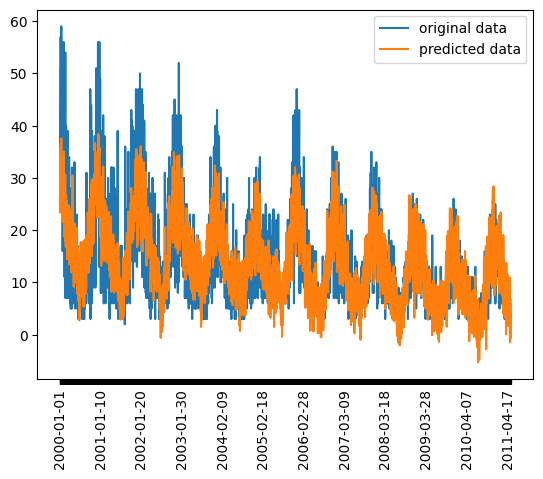

In [28]:
plt.figure()
plt.plot(y_train.reset_index(drop=True).values, label='original data')
plt.plot(predicted.reset_index(drop=True).values, label='predicted data')
plt.xticks(ticks=range(X_train.shape[0]), labels=spaced_xlabels, rotation=90)
plt.legend()
plt.show()

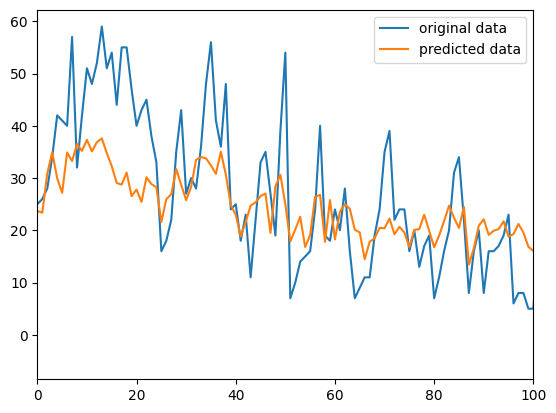

In [29]:
plt.figure()
plt.plot(y_train.reset_index(drop=True).values, label='original data')
plt.plot(predicted.reset_index(drop=True).values, label='predicted data')
plt.xlim([0, 100])
plt.legend()
plt.show()

## PCA

In [30]:
# sd - standardised
mu = X_train.drop(columns='intercept').mean(axis=0)
std = X_train.drop(columns='intercept').std(axis=0)
X_train_z = (X_train.drop(columns='intercept') - mu)/std

In [31]:
X_test_z = (X_test.drop(columns='intercept') - mu)/std

In [32]:
cov = (1/(X_train_z.shape[0]-1)) * (X_train_z.T @ X_train_z)

In [33]:
cov

,20_inch_soil_Max,20_inch_soil_Mean,20_inch_soil_Min,4_inch_soil_Max,4_inch_soil_Mean,4_inch_soil_Min,Air_Temp_Max,Air_Temp_Mean,Air_Temp_Min,Precipitation_Total,...,Station_Number,Vapor_Pressure_Deficit_Mean,Year,heat_units,max_wind_speed,reference,wind_dir_std,wind_speed_Mean,wind_vector_dir,wind_vector_mag
20_inch_soil_Max,1.000000,0.999983,0.999645,0.785929,0.783426,0.782555,0.158074,0.431982,0.180053,0.395374,...,-0.015816,0.405318,-0.035101,0.422767,0.400146,0.415214,0.258416,0.400593,0.038318,0.400056
20_inch_soil_Mean,0.999983,1.000000,0.999731,0.785933,0.782717,0.781880,0.157523,0.431791,0.179507,0.395406,...,-0.014760,0.405367,-0.032764,0.422732,0.400299,0.415131,0.258187,0.400695,0.038276,0.400161
20_inch_soil_Min,0.999645,0.999731,1.000000,0.785660,0.775293,0.774463,0.157325,0.431601,0.179316,0.395246,...,-0.014285,0.405263,-0.031075,0.422637,0.400167,0.414939,0.258326,0.400600,0.038695,0.400058
4_inch_soil_Max,0.785929,0.785933,0.785660,1.000000,0.903459,0.900950,0.195443,0.364437,0.192028,0.303214,...,-0.001395,0.317127,-0.039948,0.344791,0.308217,0.331071,0.217571,0.308474,0.047275,0.307769
4_inch_soil_Mean,0.783426,0.782717,0.775293,0.903459,1.000000,0.999507,0.166635,0.354771,0.173557,0.305388,...,-0.012421,0.317415,-0.039778,0.339001,0.311480,0.328762,0.205190,0.311064,0.029922,0.310579
4_inch_soil_Min,0.782555,0.781880,0.774463,0.900950,0.999507,1.000000,0.148737,0.348940,0.166076,0.307356,...,-0.020662,0.317318,-0.037624,0.336071,0.312629,0.326333,0.200682,0.312314,0.023607,0.311968
Air_Temp_Max,0.158074,0.157523,0.157325,0.195443,0.166635,0.148737,1.000000,0.464252,0.842885,0.010646,...,-0.112965,0.068646,-0.081854,0.247693,0.043228,0.187807,0.156716,0.017103,0.105012,0.009315
Air_Temp_Mean,0.431982,0.431791,0.431601,0.364437,0.354771,0.348940,0.464252,1.000000,0.446613,0.872881,...,-0.110528,0.906822,-0.073869,0.963815,0.889584,0.944599,0.621795,0.887072,0.158492,0.883475
Air_Temp_Min,0.180053,0.179507,0.179316,0.192028,0.173557,0.166076,0.842885,0.446613,1.000000,0.035067,...,-0.145518,0.049680,-0.130778,0.229451,0.060170,0.155655,0.029405,0.020559,0.083001,0.015361
Precipitation_Total,0.395374,0.395406,0.395246,0.303214,0.305388,0.307356,0.010646,0.872881,0.035067,1.000000,...,-0.050573,0.980209,-0.025368,0.950478,0.971060,0.957782,0.660937,0.981734,0.110648,0.980719


In [34]:
vals, vecs = np.linalg.eig(cov)

In [35]:
indices_desc = np.argsort(vals)[::-1]

In [36]:
vals_normalized = vals/np.max(vals)

In [37]:
vals_normalized = vals_normalized[indices_desc]
# vecs = vecs[:, indices_desc]

In [38]:
vals_normalized

array([1.00000000e+00, 3.50218669e-01, 2.04830525e-01, 1.24591486e-01,
       1.03047432e-01, 8.02239595e-02, 5.14954216e-02, 4.82857496e-02,
       4.30888456e-02, 2.40675244e-02, 1.07292488e-02, 5.36439294e-03,
       3.53327300e-03, 3.01182493e-03, 1.65259339e-03, 1.60420811e-03,
       1.42313024e-03, 1.59423837e-04, 1.10197314e-04, 2.99274692e-05,
       1.66743597e-05, 1.06935483e-05, 7.03399965e-06, 6.18696397e-07])

## OLS on whitened data

In [39]:
whiten_W = vecs @ np.diag((1/vals)**.5) @ vecs.T

In [40]:
X_train_z.columns

Index(['20_inch_soil_Max', '20_inch_soil_Mean', '20_inch_soil_Min',
       '4_inch_soil_Max', '4_inch_soil_Mean', '4_inch_soil_Min',
       'Air_Temp_Max', 'Air_Temp_Mean', 'Air_Temp_Min', 'Precipitation_Total',
       'Rel_Humdity_Max', 'Rel_Humidity_Mean', 'Rel_Humidity_Min',
       'Solar_Radiation_Total', 'Station_Number',
       'Vapor_Pressure_Deficit_Mean', 'Year', 'heat_units', 'max_wind_speed',
       'reference', 'wind_dir_std', 'wind_speed_Mean', 'wind_vector_dir',
       'wind_vector_mag'],
      dtype='object')

In [41]:
X_train_w = X_train_z @ whiten_W
X_test_w = X_test_z @ whiten_W

In [42]:
X_train_w

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date Local,,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.185468,-0.176068,0.035309,-0.038537,0.513228,-0.599215,-1.920383,-0.854820,0.653906,-0.350484,...,-3.167963,1.562594,-0.832163,0.384287,-0.410249,-1.836165,0.288500,-0.283924,-0.312564,0.190715
2000-01-02,-1.196781,0.859201,0.112644,-0.144862,0.664159,-0.746395,-1.744144,1.095289,-0.936426,-0.402794,...,-3.380712,-1.719256,-0.916280,1.198146,1.256655,-1.239993,-0.290908,1.142696,1.106335,-0.402844
2000-01-03,0.075165,-0.001362,-0.230341,-0.062501,0.334670,-0.566339,-0.999006,-0.781791,-1.602411,-0.368501,...,-3.286439,-0.767128,-0.926944,2.005951,0.828401,-0.895002,0.530890,0.434994,-1.586723,-1.159051
2000-01-04,0.050416,-0.237443,0.015904,-0.079535,0.132450,-0.327869,-0.618887,-0.592664,-1.598221,0.236058,...,-3.238672,-0.603960,-0.902532,1.625478,-0.688169,-0.710213,1.041729,0.230621,-0.744843,0.249670
2000-01-05,0.218520,-0.569394,0.119369,-0.100478,0.617414,-0.758728,-0.267055,-1.254351,-1.074820,0.144819,...,-3.255542,-0.592526,-0.878693,1.355126,0.450358,-1.133605,0.698631,1.514065,1.217137,-0.167862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-13,0.397695,-0.353467,0.025866,0.025817,0.058697,-0.131483,0.358870,1.935306,-0.962361,0.104524,...,-0.060347,-0.873503,1.871446,-0.418880,-0.682463,0.207670,0.478602,-0.142301,-0.920790,-0.753413
2011-05-14,0.546462,-0.333230,-0.134520,-0.004139,0.145157,-0.165456,-0.016880,0.488486,0.076244,0.001461,...,-0.094026,-0.389189,1.892155,-0.460483,0.264494,0.245875,0.640158,0.771841,0.406438,-1.396784
2011-05-15,0.047539,0.015255,0.054219,-0.006962,0.319573,-0.351006,0.121354,0.448780,-0.157001,-0.088733,...,-0.122362,-0.179964,1.868375,-0.304037,0.563564,0.365160,0.068372,-0.441528,0.573657,-0.594947


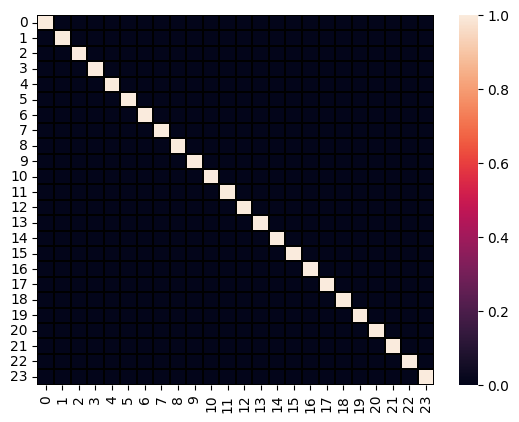

In [43]:
plt.figure()
sns.heatmap(X_train_w.corr(), linewidths=0.05, linecolor='black')
plt.show()

In [44]:
X_train_w['intercept'] = np.ones([X_train_w.shape[0], 1])
X_test_w['intercept'] = np.ones([X_test_w.shape[0], 1])

In [45]:
ols_fit = sm.regression.linear_model.OLS(endog=np.log(y_train), exog=X_train_w).fit()

In [46]:
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO AQI   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     324.7
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:51:25   Log-Likelihood:                -1925.5
No. Observations:                4156   AIC:                             3901.
Df Residuals:                    4131   BIC:                             4059.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0339      0.006     -5.672      0.000      -0.046      -0.022
1             -0.0037      0.006     -0.611      0.541      -0.015       0.008
2             -0.0063      0.006     -1.059      0.290      -0.018       0.005
3             -0.0102      0.006     -1.703      0.089      -0.022       0.002
4             -0.0032      0.006     -0.538      0.590      -0.015       0.009
5              0.0004      0.006      0.060      0.952      -0.011       0.012
6             -0.0731      0.006    -12.223      0.000      -0.085      -0.061
7             -0.0621      0.006    -10.383      0.000      -0.074      -0.050
8             -0.3487      0.006    -58.268      0.000      -0.360      -0.337
9              0.0303      0.006      5.069      0.000       0.019       0.042
10            -0.0325      0.006     -5.429      0.000      -0.044      -0.021
11            -0.0733      0.006    -12.256      0.000      -0.085      -0.062
12            -0.0511      0.006     -8.547      0.000      -0.063      -0.039
13            -0.1721      0.006    -28.752      0.000      -0.184      -0.160
14            -0.0676      0.006    -11.299      0.000      -0.079      -0.056
15             0.1358      0.006     22.689      0.000       0.124       0.148
16            -0.2231      0.006    -37.280      0.000      -0.235      -0.211
17            -0.0030      0.006     -0.496      0.620      -0.015       0.009
18            -0.0642      0.006    -10.726      0.000      -0.076      -0.052
19            -0.0215      0.006     -3.595      0.000      -0.033      -0.010
20             0.0512      0.006      8.549      0.000       0.039       0.063
21             0.0292      0.006      4.878      0.000       0.017       0.041
22            -0.1256      0.006    -20.986      0.000      -0.137      -0.114
23             0.1038      0.006     17.339      0.000       0.092       0.115
intercept      2.4368      0.006    407.255      0.000       2.425       2.449
==============================================================================
Omnibus:                       83.347   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.231
Skew:                          -0.298   Prob(JB):                     1.27e-21
Kurtosis:                       3.448   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
ols1_train_pred = ols_fit.predict(exog=X_train_w)
ols1_test_pred = ols_fit.predict(exog=X_test_w)

In [48]:
X_train_z['intercept'] = np.ones([X_train_z.shape[0], 1])
X_test_z['intercept'] = np.ones([X_test_z.shape[0], 1])

In [49]:
ols_fit2 = sm.regression.linear_model.OLS(endog=np.log(y_train), exog=X_train_z).fit()

In [50]:
ols_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO AQI   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     324.7
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:51:25   Log-Likelihood:                -1925.5
No. Observations:                4156   AIC:                             3901.
Df Residuals:                    4131   BIC:                             4059.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
20_inch_soil_Max               -5.1373      1.445     -3.555      0.000      -7.970      -2.304
20_inch_soil_Mean               5.2192      1.694      3.081      0.002       1.898       8.540
20_inch_soil_Min               -0.0951      0.449     -0.212      0.832      -0.975       0.784
4_inch_soil_Max                -0.0231      0.020     -1.159      0.246      -0.062       0.016
4_inch_soil_Mean                0.0898      0.461      0.195      0.845      -0.813       0.993
4_inch_soil_Min                -0.0522      0.454     -0.115      0.909      -0.943       0.839
Air_Temp_Max                    0.7575      0.054     14.004      0.000       0.651       0.864
Air_Temp_Mean                  -1.1742      0.174     -6.749      0.000      -1.515      -0.833
Air_Temp_Min                   -0.1905      0.046     -4.147      0.000      -0.281      -0.100
Precipitation_Total            -0.0781      0.039     -1.978      0.048      -0.155      -0.001
Rel_Humdity_Max                 0.0277      0.012      2.302      0.021       0.004       0.051
Rel_Humidity_Mean              -0.1604      0.025     -6.448      0.000      -0.209      -0.112
Rel_Humidity_Min                0.0292      0.028      1.056      0.291      -0.025       0.083
Solar_Radiation_Total          -0.5017      0.043    -11.621      0.000      -0.586      -0.417
Station_Number                 -0.0158      0.009     -1.727      0.084      -0.034       0.002
Vapor_Pressure_Deficit_Mean     3.1307      0.280     11.169      0.000       2.581       3.680
Year                           -0.2470      0.009    -28.771      0.000      -0.264      -0.230
heat_units                     -0.7960      0.109     -7.332      0.000      -1.009      -0.583
max_wind_speed                 -0.2747      0.053     -5.180      0.000      -0.379      -0.171
reference                      -0.9715      0.114     -8.513      0.000      -1.195      -0.748
wind_dir_std                    0.0323      0.017      1.895      0.058      -0.001       0.066
wind_speed_Mean                -2.5036      0.394     -6.356      0.000      -3.276      -1.731
wind_vector_dir                -0.0551      0.007     -8.406      0.000      -0.068      -0.042
wind_vector_mag                 2.9848      0.385      7.762      0.000       2.231       3.739
intercept                       2.4368      0.006    407.255      0.000       2.425       2.449
==============================================================================
Omnibus:                       83.347   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.231
Skew:                          -0.298   Prob(JB):                     1.27e-21
Kurtosis:                       3.448   Cond. No.                     1.27e+03


In [51]:
ols2_train_pred = ols_fit2.predict(exog=X_train_z)
ols2_test_pred = ols_fit2.predict(exog=X_test_z)

In [54]:
diff1 = y_test - ols1_test_pred
ols1_mse = (1/diff1.shape[0]) * (diff1.T @ diff1)

diff2 = y_test - ols2_test_pred
ols2_mse = (1/diff2.shape[0]) * (diff2.T @ diff2)

In [55]:
print(f"MSE of OLS1 is {ols1_mse}")
print(f"MSE of OLS2 is {ols2_mse}")

MSE of OLS1 is 64.26086010190251
MSE of OLS2 is 64.26086010190258


In [56]:
X_train_z.columns

Index(['20_inch_soil_Max', '20_inch_soil_Mean', '20_inch_soil_Min',
       '4_inch_soil_Max', '4_inch_soil_Mean', '4_inch_soil_Min',
       'Air_Temp_Max', 'Air_Temp_Mean', 'Air_Temp_Min', 'Precipitation_Total',
       'Rel_Humdity_Max', 'Rel_Humidity_Mean', 'Rel_Humidity_Min',
       'Solar_Radiation_Total', 'Station_Number',
       'Vapor_Pressure_Deficit_Mean', 'Year', 'heat_units', 'max_wind_speed',
       'reference', 'wind_dir_std', 'wind_speed_Mean', 'wind_vector_dir',
       'wind_vector_mag', 'intercept'],
      dtype='object')

In [57]:
vals_normalized

array([1.00000000e+00, 3.50218669e-01, 2.04830525e-01, 1.24591486e-01,
       1.03047432e-01, 8.02239595e-02, 5.14954216e-02, 4.82857496e-02,
       4.30888456e-02, 2.40675244e-02, 1.07292488e-02, 5.36439294e-03,
       3.53327300e-03, 3.01182493e-03, 1.65259339e-03, 1.60420811e-03,
       1.42313024e-03, 1.59423837e-04, 1.10197314e-04, 2.99274692e-05,
       1.66743597e-05, 1.06935483e-05, 7.03399965e-06, 6.18696397e-07])

In [58]:
vals = vals[indices_desc]
vecs = vecs[:, indices_desc]

In [59]:
informative_cols = vals_normalized >= 0.05

In [60]:
retained_evecs = vecs[:, informative_cols]

In [61]:
X_train_l = X_train_z[np.setdiff1d(X_train_z.columns, ['intercept'])]
X_train_l = X_train_l @ retained_evecs
X_train_l['intercept'] = np.ones([X_train_l.shape[0], 1])

X_test_l = X_test_z[np.setdiff1d(X_test_z.columns, ['intercept'])]
X_test_l = X_test_l @ retained_evecs
X_test_l['intercept'] = np.ones([X_test_l.shape[0], 1])

In [62]:
ols3_fit = sm.regression.linear_model.OLS(endog=np.log(y_train), exog=X_train_l).fit()

In [63]:
ols3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO AQI   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     490.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:52:02   Log-Likelihood:                -2875.1
No. Observations:                4156   AIC:                             5766.
Df Residuals:                    4148   BIC:                             5817.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0162      0.002     -7.370      0.000      -0.021      -0.012
1              0.0297      0.004      7.990      0.000       0.022       0.037
2              0.1012      0.005     20.850      0.000       0.092       0.111
3              0.2117      0.006     34.005      0.000       0.199       0.224
4             -0.2546      0.007    -37.199      0.000      -0.268      -0.241
5              0.0864      0.008     11.139      0.000       0.071       0.102
6             -0.1424      0.010    -14.705      0.000      -0.161      -0.123
intercept      2.4368      0.008    324.739      0.000       2.422       2.451
==============================================================================
Omnibus:                       66.902   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.625
Skew:                          -0.276   Prob(JB):                     1.03e-16
Kurtosis:                       3.346   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
ols3_train_pred = ols3_fit.predict(exog=X_train_l)
ols3_test_pred = ols3_fit.predict(exog=X_test_l)

In [69]:
diff3 = y_test - ols3_test_pred
ols3_mse = (1/diff3.shape[0]) * (diff3.T @ diff3)

In [70]:
print(f"RMSE of OLS1 is {ols1_mse**.5}")
print(f"RMSE of OLS2 is {ols2_mse**.5}")
print(f"RMSE of OLS3 is {ols3_mse**.5}")

RMSE of OLS1 is 8.016287176860775
RMSE of OLS2 is 8.01628717686078
RMSE of OLS3 is 7.9226966338051135


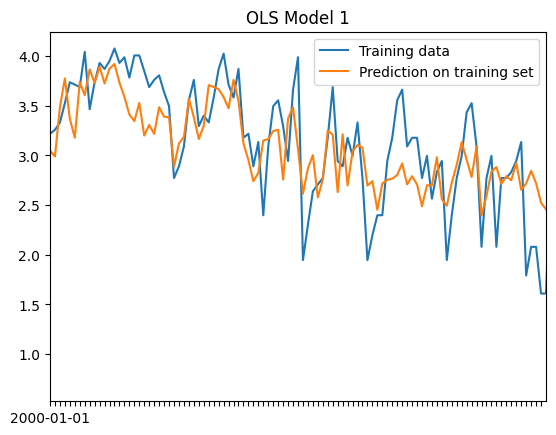

In [71]:
plt.figure()
plt.plot(np.log(y_train), label='Training data')
plt.plot(ols_fit.predict(X_train_w), label='Prediction on training set')
plt.xlim([0, 100])
plt.xticks(range(100), labels=spaced_xlabels[:100])
plt.legend()
plt.title('OLS Model 1')
plt.show()

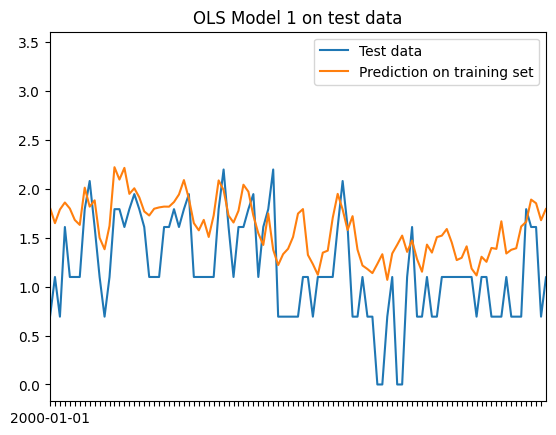

In [72]:
plt.figure()
plt.plot(np.log(y_test), label='Test data')
plt.plot(ols_fit.predict(exog=X_test_w), label='Prediction on training set')
plt.xlim([0, 100])
plt.xticks(range(100), labels=spaced_xlabels[:100])
plt.legend()
plt.title('OLS Model 1 on test data')
plt.show()

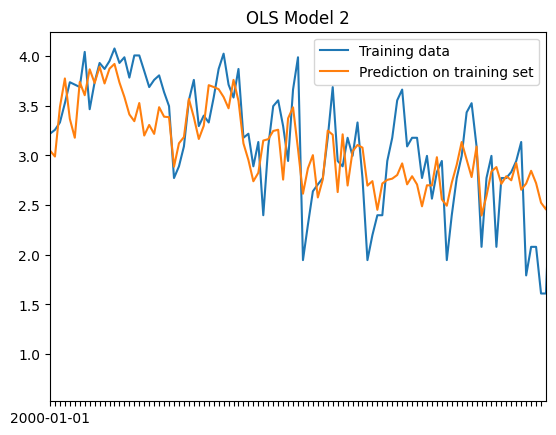

In [73]:
plt.figure()
plt.plot(np.log(y_train), label='Training data')
plt.plot(ols_fit2.predict(X_train_z), label='Prediction on training set')
plt.xlim([0, 100])
plt.xticks(range(100), labels=spaced_xlabels[:100])
plt.legend()
plt.title('OLS Model 2')
plt.show()

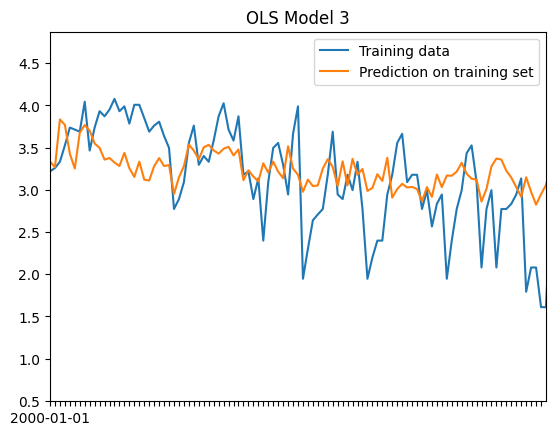

In [74]:
plt.figure()
plt.plot(np.log(y_train), label='Training data')
plt.plot(ols3_fit.predict(X_train_l), label='Prediction on training set')
plt.xlim([0, 100])
plt.xticks(range(100), labels=spaced_xlabels[:100])
plt.legend()
plt.title('OLS Model 3')
plt.show()

## Stepwise

In [75]:
def backwise_reg(X_train, y_train):
    grid = np.zeros([1, len(cnames)])

    curr_value = 1
    filtered_cnames = np.setdiff1d(cnames, ['bias_c']+target)
    ignored_cnames = []
    epsilon = 1e-3
    while curr_value > 0.05 + epsilon:
        X_tr_subset = df_train[['bias_c'] + list(filtered_cnames)]
        # X_ts_subset = df_test[['bias_c'] + list(np.setdiff1d(filtered_cnames, cname))]
        ols = OLS(y_train.reshape([-1]), X_tr_subset).fit()
        aic = ols.aic
        bic = ols.bic
        adj_r2 = ols.rsquared_adj

        max_pval_idx = ols.pvalues.iloc[1:].argmax()
        curr_value = ols.pvalues.iloc[1:][max_pval_idx]

        if curr_value <= 0.05:
            final_ols = OLS(y_train.reshape([-1]), df_train[['bias_c'] + list(filtered_cnames)]).fit()
            return ignored_cnames, filtered_cnames, final_ols

        ignore_col = ols.pvalues.iloc[1:].index[max_pval_idx]
        ##--------- Check for improvement
        tmp_filtered_cnames = list(filter(lambda x: x != ignore_col, filtered_cnames))
        tmp_X = df_train[['bias_c'] + list(tmp_filtered_cnames)]
        tmp_ols = OLS(y_train.reshape([-1]), tmp_X).fit()
        new_adj_r2 = tmp_ols.rsquared_adj
        new_bic = tmp_ols.bic
        new_aic = tmp_ols.aic
        if (new_adj_r2 < adj_r2 and np.abs(new_adj_r2 - adj_r2) > 2e-2) or new_bic > bic or new_aic > aic:
            final_ols = OLS(y_train.reshape([-1]), df_train[['bias_c'] + list(filtered_cnames)]).fit()
            return ignored_cnames, filtered_cnames, final_ols
        ##--------

        ignored_cnames.append(ignore_col)
        filtered_cnames = list(filter(lambda x: x != ignore_col, filtered_cnames))
    final_ols = OLS(y_train.reshape([-1]), df_train[['bias_c'] + list(filtered_cnames)]).fit()
    return ignored_cnames, filtered_cnames, final_ols